In [41]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
extract_dir = '/Users/dashazabelina/Desktop/facebook'
os.makedirs(extract_dir, exist_ok = True)

In [3]:
extracted_files = os.listdir(extract_dir)
extracted_files

['3980.feat',
 '3980.featnames',
 '1912.egofeat',
 '686.edges',
 '686.featnames',
 '348.edges',
 '414.circles',
 '3437.egofeat',
 '414.feat',
 '1684.featnames',
 '3437.edges',
 '414.egofeat',
 '3437.circles',
 '1912.edges',
 '1912.circles',
 '1912.feat',
 '3437.featnames',
 '0.featnames',
 '348.circles',
 '1684.edges',
 '0.edges',
 '348.featnames',
 '107.feat',
 '1684.feat',
 '686.circles',
 '698.featnames',
 '686.egofeat',
 '698.edges',
 '686.feat',
 '3980.edges',
 '348.egofeat',
 '3437.feat',
 '3980.egofeat',
 '414.edges',
 '107.featnames',
 '107.egofeat',
 '0.feat',
 '1684.egofeat',
 '348.feat',
 '107.circles',
 '1684.circles',
 '107.edges',
 '3980.circles',
 '0.circles',
 '698.circles',
 '414.featnames',
 '698.egofeat',
 '1912.featnames',
 '0.egofeat',
 '698.feat']

In [4]:
# See available nodes
files = os.listdir(extract_dir)

node_ids = set()
for file_name in files:
    if file_name.endswith(('.edges', '.circles', '.feat', '.egofeat', '.featnames')):
        node_id = file_name.split('.')[0]
        node_ids.add(node_id)

node_ids = sorted(node_ids)
node_ids

['0', '107', '1684', '1912', '3437', '348', '3980', '414', '686', '698']

In [5]:
# Function to load edges from a file
def load_edges(extract_dir):
    edges = []
    with open(extract_dir, 'r') as f:
        for line in f:
            edge = tuple(map(int, line.strip().split()))
            edges.append(edge)
    return edges

In [6]:
# Load edges for node 0
for node_id in node_ids:
    edges_file = os.path.join(extract_dir, f'{node_id}.edges')
    edges = load_edges(edges_file)

    # Printing number of nodes and edges for node from previous step
    G = nx.Graph()
    G.add_edges_from(edges)

    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
   
    print(f"The ego network for node {node_id} contains {num_nodes} nodes and  {num_edges} edges")

The ego network for node 0 contains 333 nodes and  2519 edges
The ego network for node 107 contains 1034 nodes and  26749 edges
The ego network for node 1684 contains 786 nodes and  14024 edges
The ego network for node 1912 contains 747 nodes and  30025 edges
The ego network for node 3437 contains 534 nodes and  4813 edges
The ego network for node 348 contains 224 nodes and  3192 edges
The ego network for node 3980 contains 52 nodes and  146 edges
The ego network for node 414 contains 150 nodes and  1693 edges
The ego network for node 686 contains 168 nodes and  1656 edges
The ego network for node 698 contains 61 nodes and  270 edges


In [7]:
# Compute centrality measures (for each network)
## Define to compute centralities for each graph
def compute_centrality_measures(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)
    return {
        'degree_centrality': degree_centrality,
        'betweenness_centrality': betweenness_centrality,
        'closeness_centrality': closeness_centrality,
        'eigenvector_centrality': eigenvector_centrality
    }

def print_centrality_measures(node_id, centrality_measures):
    print(f"Centrality measures for the ego network of node {node_id}:")
    degree_centrality = centrality_measures['degree_centrality']
    betweenness_centrality = centrality_measures['betweenness_centrality']
    closeness_centrality = centrality_measures['closeness_centrality']
    eigenvector_centrality = centrality_measures['eigenvector_centrality']
    
    print(f"The average degree centrality is {sum(degree_centrality.values()) / len(degree_centrality):.4f}")
    print(f"The average betweenness centrality is {sum(betweenness_centrality.values()) / len(betweenness_centrality):.4f}")
    print(f"The average closeness centrality is {sum(closeness_centrality.values()) / len(closeness_centrality):.4f}")
    print(f"The average eigenvector centrality is {sum(eigenvector_centrality.values()) / len(eigenvector_centrality):.4f}")

selected_node_ids = node_ids[:10]

for node_id in selected_node_ids:
    edges_file = os.path.join(extract_dir, f'{node_id}.edges')
    edges = load_edges(edges_file)
    
    G = nx.Graph()
    G.add_edges_from(edges)
    
    centrality_measures = compute_centrality_measures(G)
    
    print_centrality_measures(node_id, centrality_measures)
    print("\n")

Centrality measures for the ego network of node 0:
The average degree centrality is 0.0456
The average betweenness centrality is 0.0079
The average closeness centrality is 0.2657
The average eigenvector centrality is 0.0302


Centrality measures for the ego network of node 107:
The average degree centrality is 0.0501
The average betweenness centrality is 0.0019
The average closeness centrality is 0.3454
The average eigenvector centrality is 0.0158


Centrality measures for the ego network of node 1684:
The average degree centrality is 0.0455
The average betweenness centrality is 0.0025
The average closeness centrality is 0.3268
The average eigenvector centrality is 0.0161


Centrality measures for the ego network of node 1912:
The average degree centrality is 0.1078
The average betweenness centrality is 0.0021
The average closeness centrality is 0.3981
The average eigenvector centrality is 0.0201


Centrality measures for the ego network of node 3437:
The average degree centrality is 0

In [8]:
# Function to load circles from a file
def load_circles(extract_dir):
    circles = []
    with open(extract_dir, 'r') as f:
        for line in f:
            circle = line.strip().split()[1:]
            circles.append(circle)
    return circles

In [9]:
# Function to load features from a file
def load_features(extract_dir):
    features = []
    with open(extract_dir, 'r') as f:
        for line in f:
             features.append(list(map(int, line.strip().split()[1:])))
    return features

In [10]:
# Function to load feature names from a file
def load_featnames(extract_dir):
    with open(extract_dir, 'r') as f:
        featnames = [line.strip() for line in f]
    return featnames

In [11]:
# Function to adjust the length of the features
def adjust_features_length(features, target_length):
    while len(features) < target_length:
        features.append(0)
    return features

In [27]:
for node_id in selected_node_ids:
    try:
        # Load circles
        circles_file = os.path.join(extract_dir, f'{node_id}.circles')
        circles = load_circles(circles_file)
        num_circles = len(circles)
        avg_circle_size = sum(len(circle) for circle in circles) / num_circles if num_circles > 0 else 0

        # Print the analysis results
        print(f"Analysis for node {node_id}:")
        print(f"Number of circles: {num_circles}")
        print(f"Average circle size: {avg_circle_size:.2f}")
        print()
    except KeyError as e:
        print(f"KeyError encountered for node {node_id}: {e}")
    except Exception as e:
        print(f"An error occurred for node {node_id}: {e}")

Analysis for node 0:
Number of circles: 24
Average circle size: 13.54

Analysis for node 107:
Number of circles: 9
Average circle size: 55.67

Analysis for node 1684:
Number of circles: 17
Average circle size: 45.71

Analysis for node 1912:
Number of circles: 46
Average circle size: 23.15

Analysis for node 3437:
Number of circles: 32
Average circle size: 6.00

Analysis for node 348:
Number of circles: 14
Average circle size: 40.50

Analysis for node 3980:
Number of circles: 17
Average circle size: 3.41

Analysis for node 414:
Number of circles: 7
Average circle size: 25.43

Analysis for node 686:
Number of circles: 14
Average circle size: 34.64

Analysis for node 698:
Number of circles: 13
Average circle size: 6.54



In [35]:
# Computing diameter
def compute_diameter(G):
    try:
        diameter = nx.diameter(G)
    except nx.NetworkXError as e:
        print(f"Error computing diameter: {e}")
        diameter = float('inf')
    return diameter

diameter_results = {}
for node_id in selected_node_ids:
    try:
        edges_file = os.path.join(extract_dir, f'{node_id}.edges')
        edges = load_edges(edges_file)
    
        G = nx.Graph()
        G.add_edges_from(edges)
        
        print(f"Node {node_id} Graph Nodes: {list(G.nodes)[:5]}... (total {len(G.nodes)} nodes)")
        
        diameter = compute_diameter(G)
        diameter_results[node_id] = diameter
        
        print(f"Diameter for the ego network of node {node_id}: {diameter}")
        
    except KeyError as e:
        print(f"KeyError encountered for node {node_id}: {e}")
    except Exception as e:
        print(f"An error occurred for node {node_id}: {e}")

diameter_results

Node 0 Graph Nodes: [236, 186, 122, 285, 24]... (total 333 nodes)
Error computing diameter: Found infinite path length because the graph is not connected
Diameter for the ego network of node 0: inf
Node 107 Graph Nodes: [953, 1323, 1789, 1707, 1175]... (total 1034 nodes)
Diameter for the ego network of node 107: 9
Node 1684 Graph Nodes: [2849, 3021, 2694, 3096, 2818]... (total 786 nodes)
Error computing diameter: Found infinite path length because the graph is not connected
Diameter for the ego network of node 1684: inf
Node 1912 Graph Nodes: [2290, 2363, 2346, 2025, 2140]... (total 747 nodes)
Error computing diameter: Found infinite path length because the graph is not connected
Diameter for the ego network of node 1912: inf
Node 3437 Graph Nodes: [3825, 3568, 3549, 3905, 3750]... (total 534 nodes)
Error computing diameter: Found infinite path length because the graph is not connected
Diameter for the ego network of node 3437: inf
Node 348 Graph Nodes: [436, 428, 450, 531, 538]... (to

{'0': inf,
 '107': 9,
 '1684': inf,
 '1912': inf,
 '3437': inf,
 '348': 9,
 '3980': inf,
 '414': inf,
 '686': 6,
 '698': inf}

In [39]:
# Compute density
def compute_density(G):
    return nx.density(G)

density_results = {}
for node_id in selected_node_ids:
    try:
        edges_file = os.path.join(extract_dir, f'{node_id}.edges')
        edges = load_edges(edges_file)
        
        G = nx.Graph()
        G.add_edges_from(edges)
    
        density = compute_density(G)
        density_results[node_id] = density
        
        print(f"Density for the ego network of node {node_id}: {density:.4f}")
        
    except KeyError as e:
        print(f"KeyError encountered for node {node_id}: {e}")
        traceback.print_exc()
    except Exception as e:
        print(f"An error occurred for node {node_id}: {e}")
        traceback.print_exc()

Density for the ego network of node 0: 0.0456
Density for the ego network of node 107: 0.0501
Density for the ego network of node 1684: 0.0455
Density for the ego network of node 1912: 0.1078
Density for the ego network of node 3437: 0.0338
Density for the ego network of node 348: 0.1278
Density for the ego network of node 3980: 0.1101
Density for the ego network of node 414: 0.1515
Density for the ego network of node 686: 0.1180
Density for the ego network of node 698: 0.1475


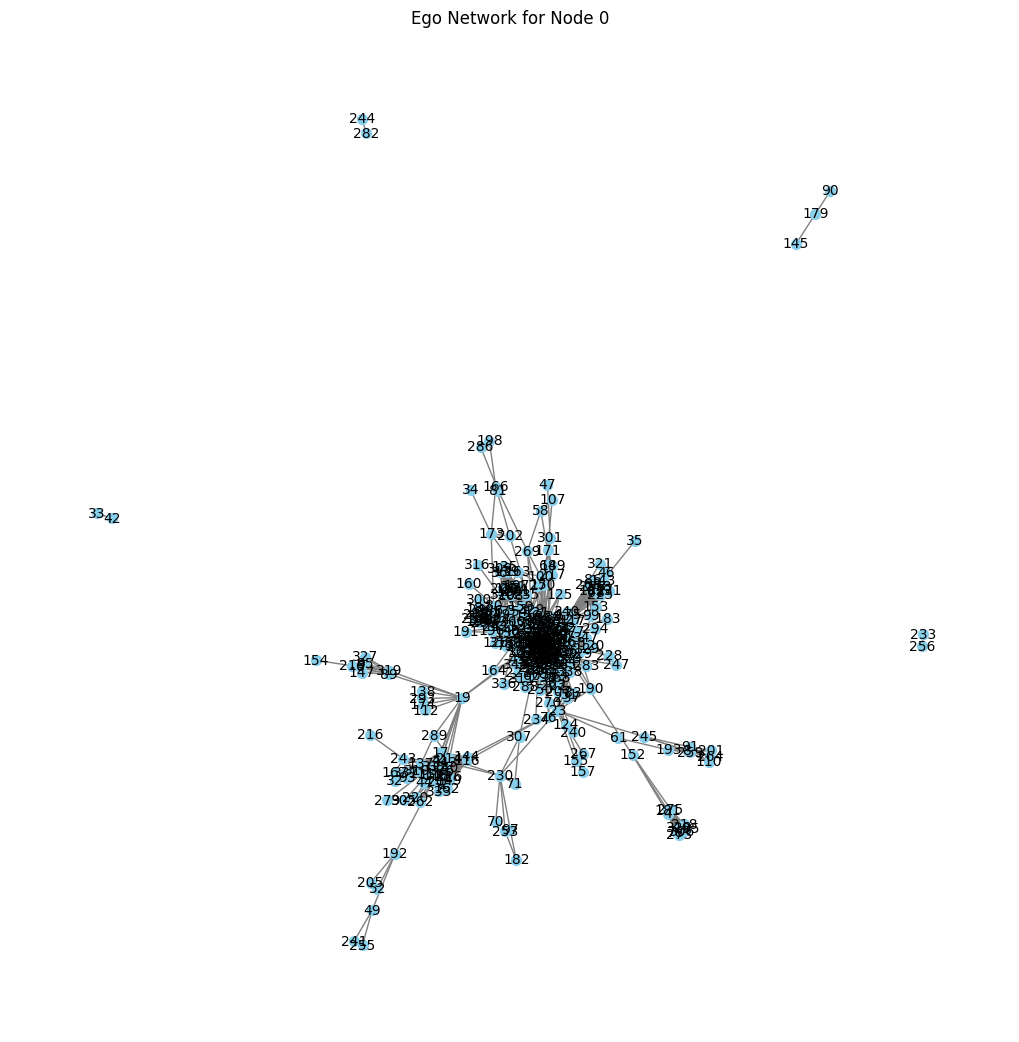

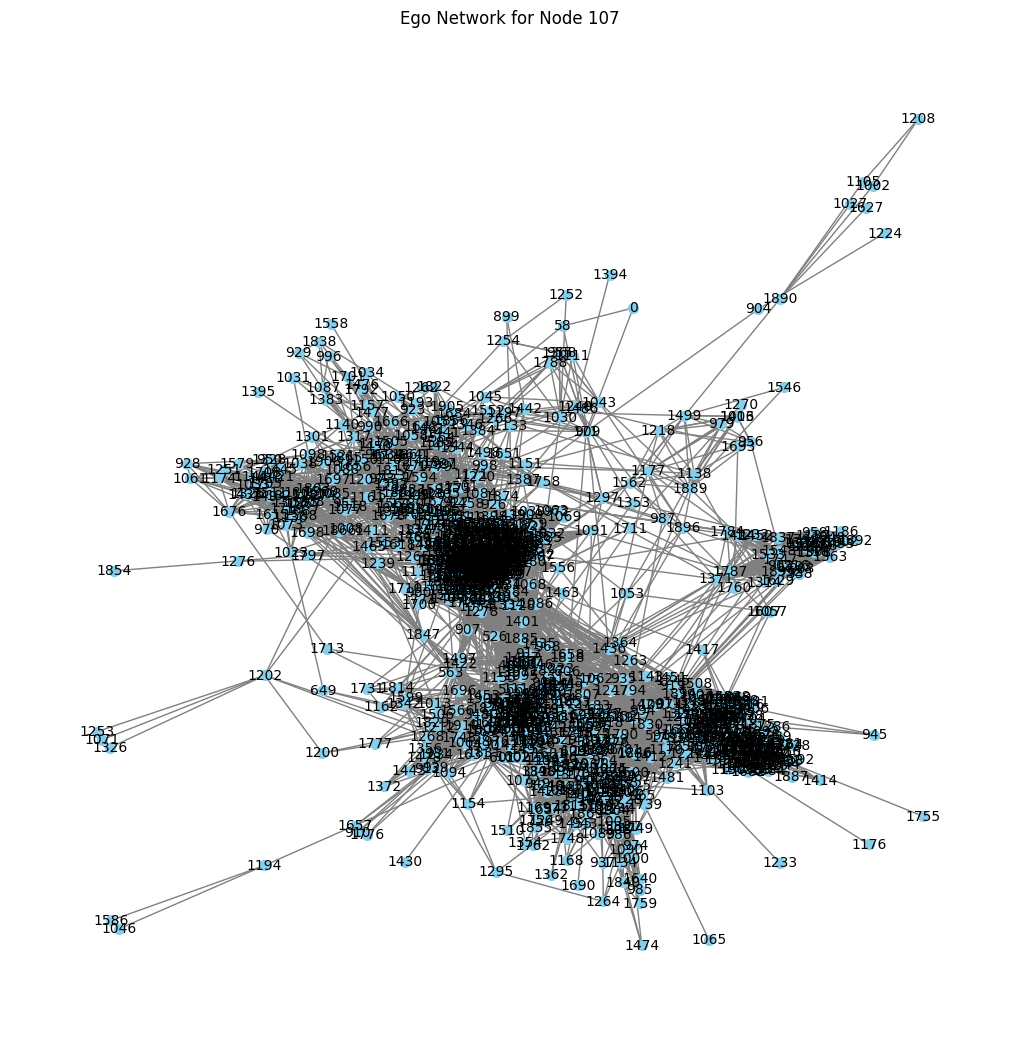

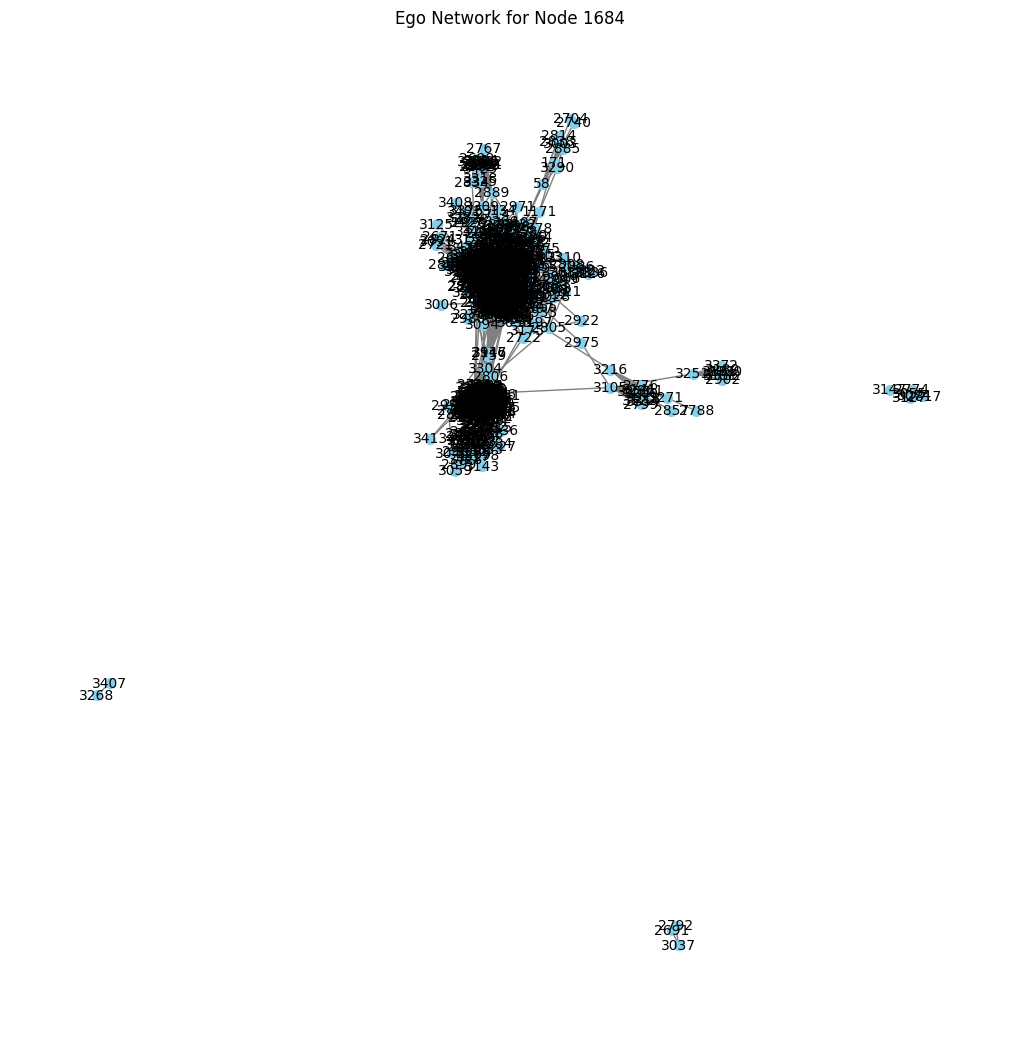

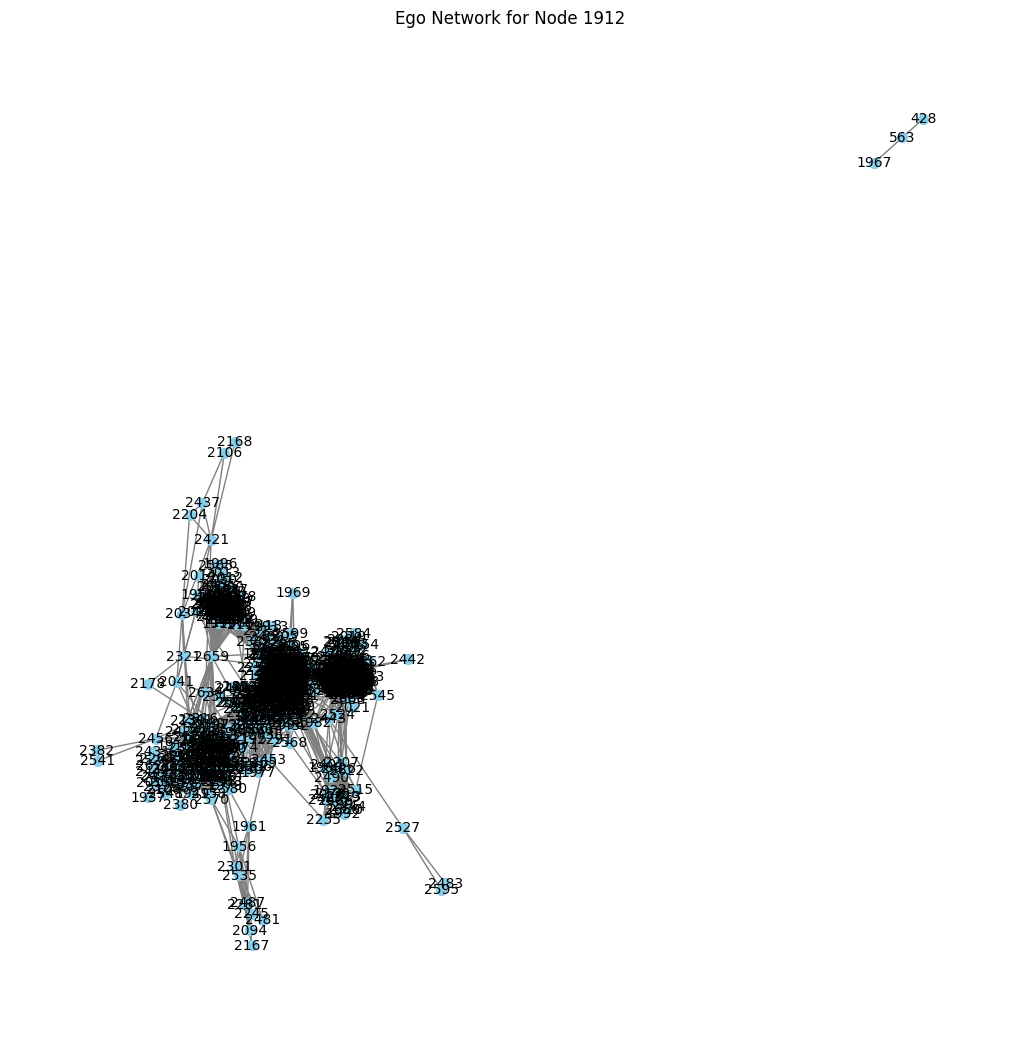

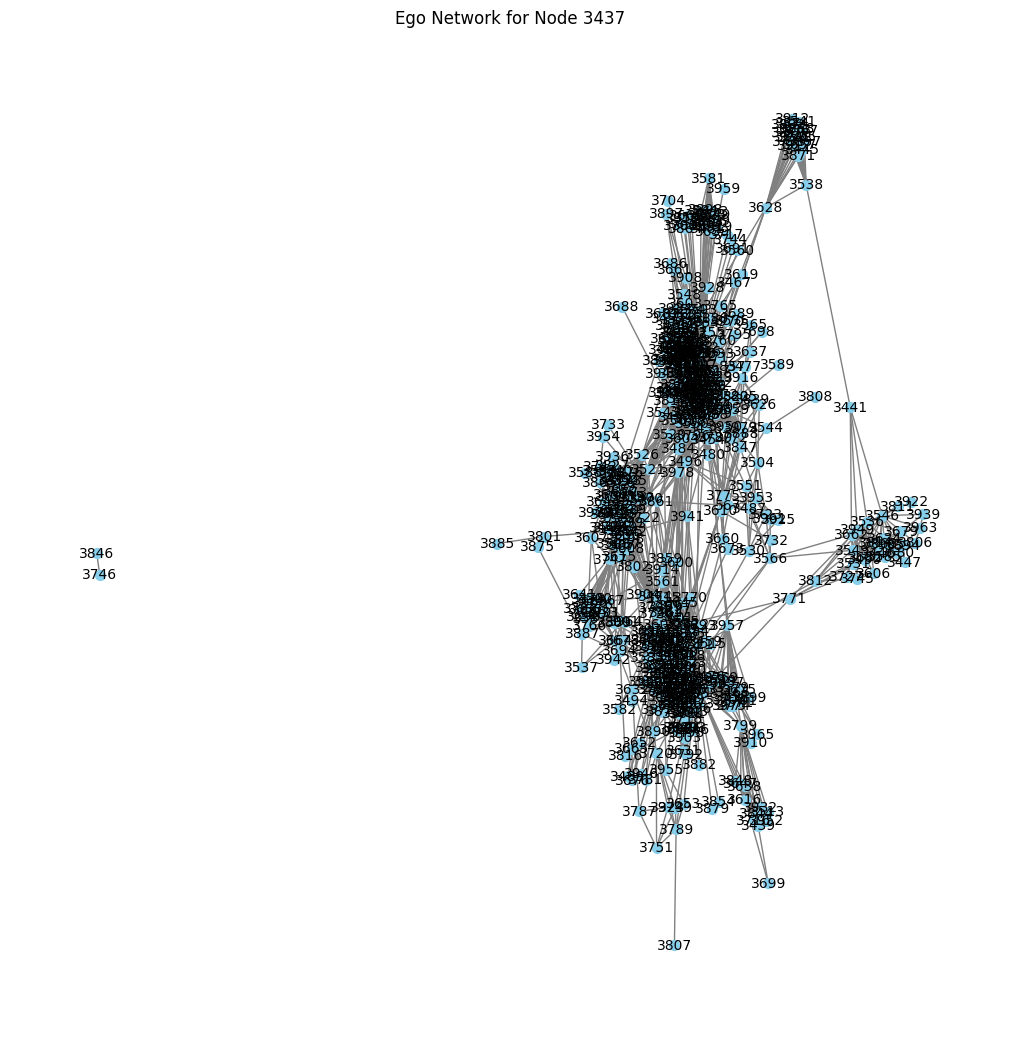

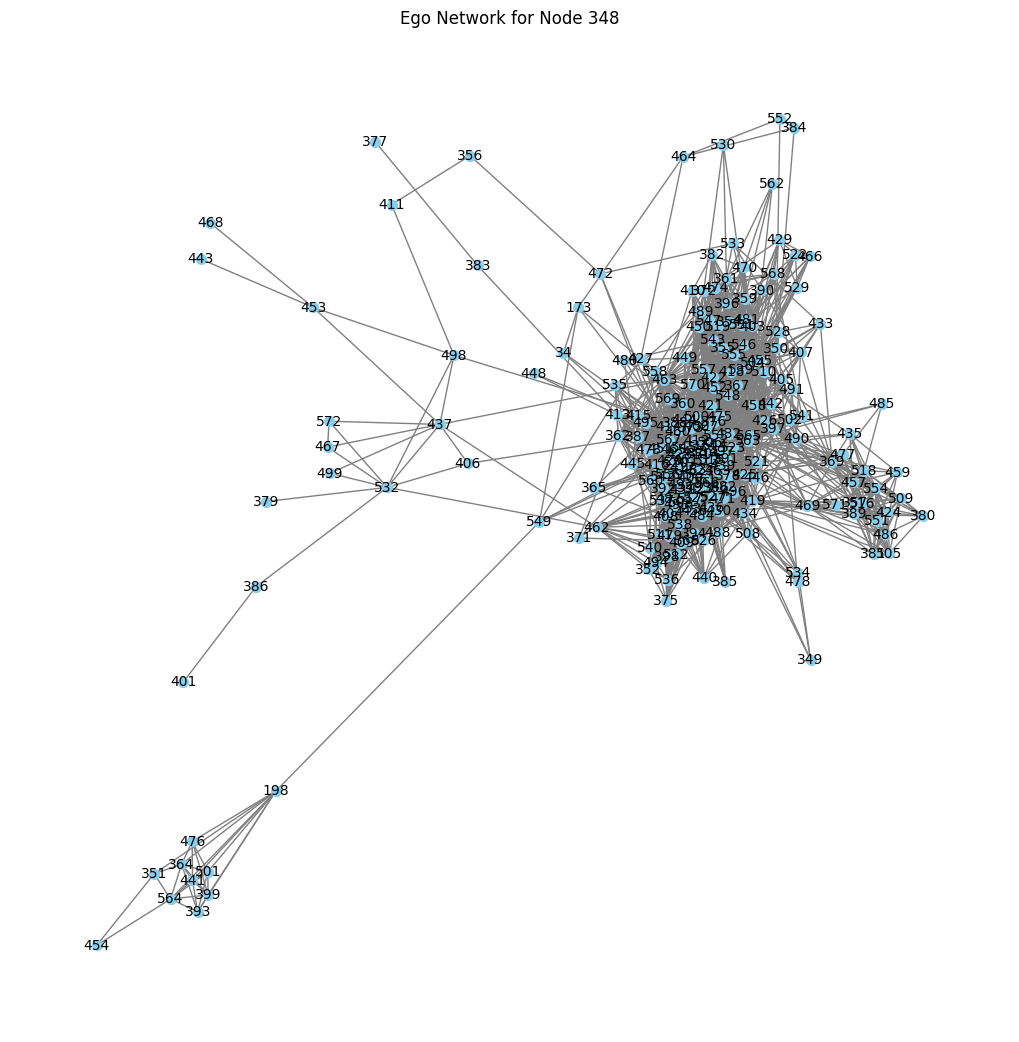

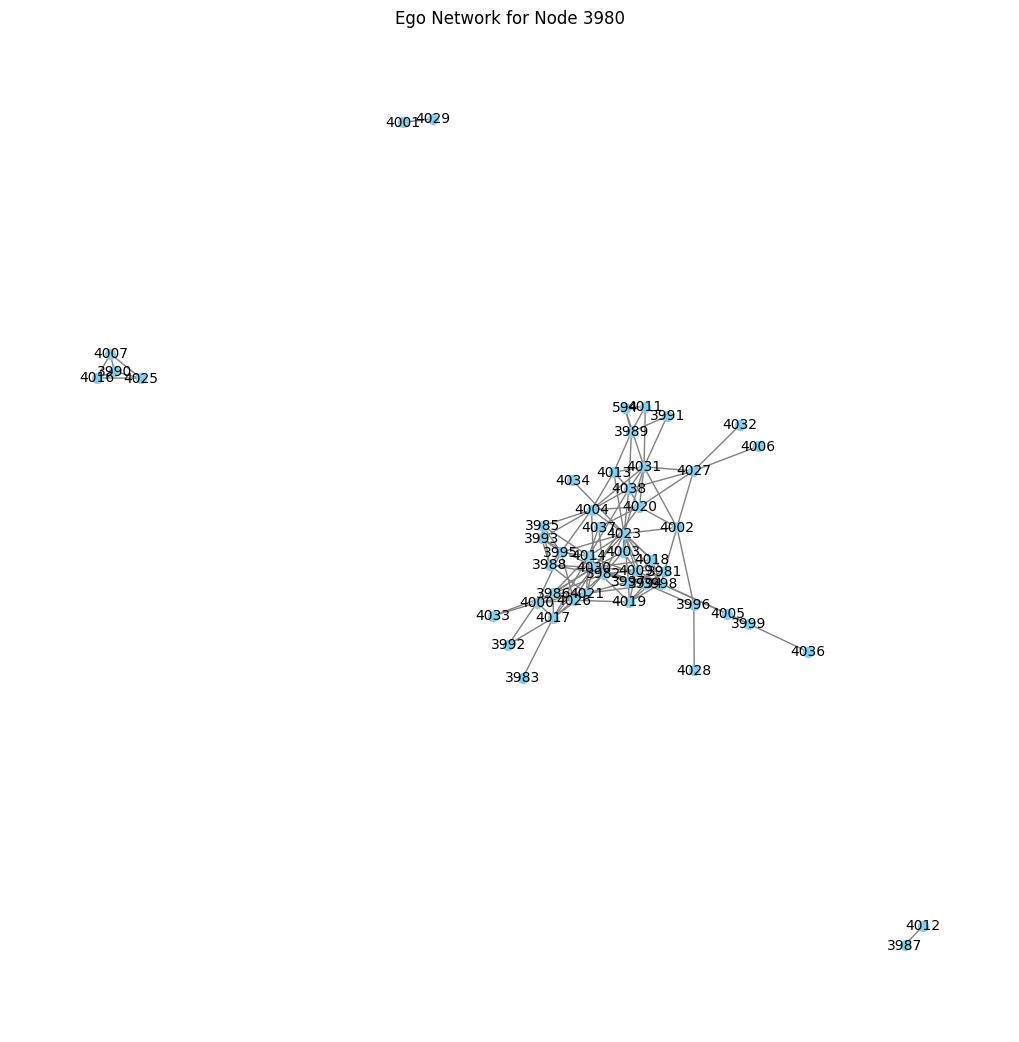

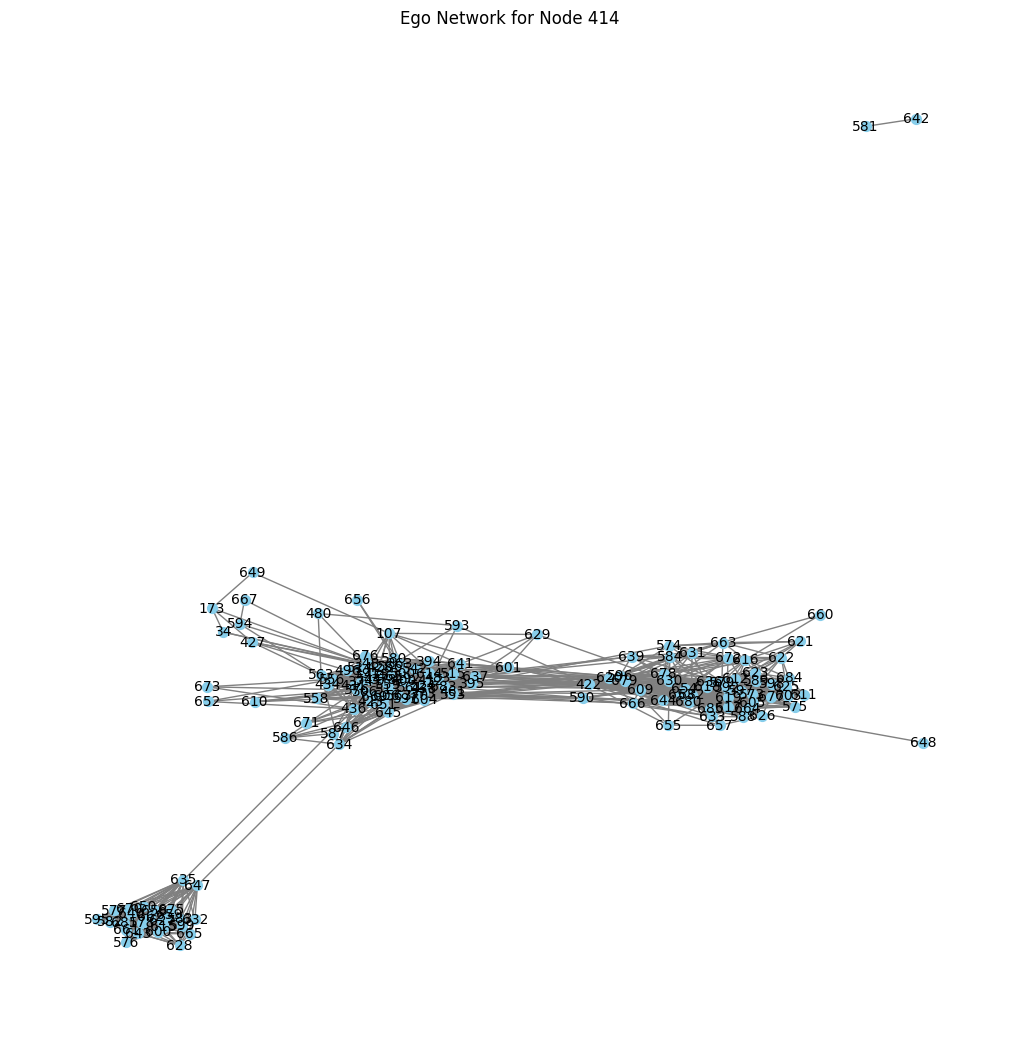

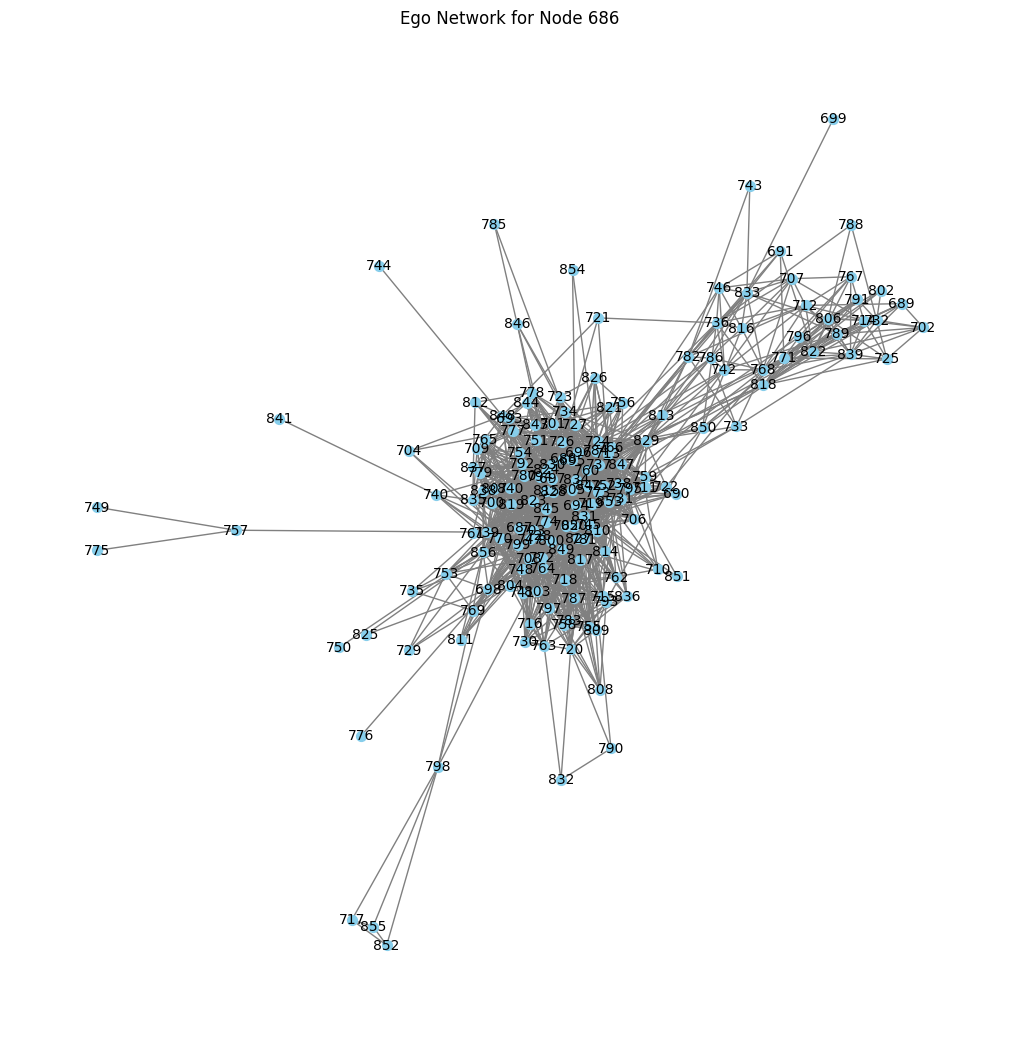

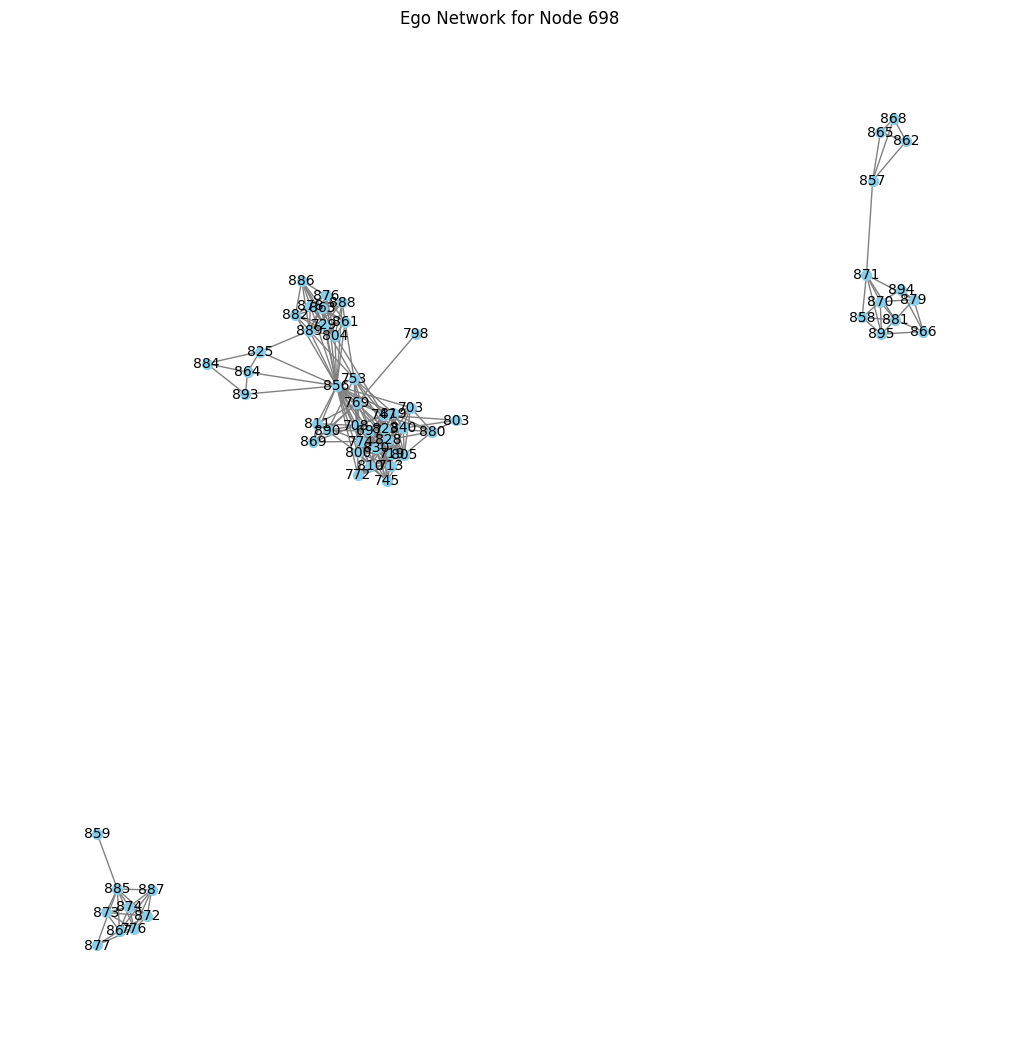

In [42]:
# Visualizing graphs
def visualize_graph(node_id, G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", edge_color="gray", font_size=10)
    plt.title(f"Ego Network for Node {node_id}")
    plt.show()

for node_id in selected_node_ids:
    try:
        edges_file = os.path.join(extract_dir, f'{node_id}.edges')
        edges = load_edges(edges_file)
        
        G = nx.Graph()
        G.add_edges_from(edges)
        
        visualize_graph(node_id, G)
        
    except Exception as e:
        print(f"An error occurred for node {node_id}: {e}")